# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
#print(weather_api_key)

### Generate the Cities List by Using the `citipy` Library

In [49]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


In [50]:
#Set the API base URL
# api_key = weather_api_key
# url = "http://api.openweathermap.org/data/2.5/weather?appid=" + api_key
#url

In [51]:
   # Create endpoint URL with each city
city_url = url + "&q="+ cities[0]
city_url
city1 = requests.get(city_url).json()
city1


{'coord': {'lon': 18.4009, 'lat': 54.7909},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 11.07,
  'feels_like': 10.35,
  'temp_min': 9.67,
  'temp_max': 11.75,
  'pressure': 1022,
  'humidity': 81,
  'sea_level': 1022,
  'grnd_level': 1020},
 'visibility': 10000,
 'wind': {'speed': 3.29, 'deg': 146, 'gust': 3.94},
 'clouds': {'all': 1},
 'dt': 1686003420,
 'sys': {'type': 2,
  'id': 2008603,
  'country': 'PL',
  'sunrise': 1686017555,
  'sunset': 1686079061},
 'timezone': 7200,
 'id': 3081752,
 'name': 'Władysławowo',
 'cod': 200}

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [52]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
# Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
# Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | wladyslawowo
Processing Record 2 of Set 1 | laojunmiao
Processing Record 3 of Set 1 | taiohae
City not found. Skipping...
Processing Record 4 of Set 1 | port mathurin
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | rogozno
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | hamilton
Processing Record 9 of Set 1 | vilyuchinsk
Processing Record 10 of Set 1 | puerto baquerizo moreno
Processing Record 11 of Set 1 | sitampiky
City not found. Skipping...
Processing Record 12 of Set 1 | elmina
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | tarauaca
Processing Record 15 of Set 1 | salaqi
Processing Record 16 of Set 1 | magog
Processing Record 17 of Set 1 | prado
Processing Record 18 of Set 1 | edinburgh of the seven seas
Processing Record 19 of Set 1 | papatowai
Processing Record 20 of Set 1 | novyy urgal
Processing Record 21 of Set 1 | p

Processing Record 43 of Set 4 | college
Processing Record 44 of Set 4 | lompoc
Processing Record 45 of Set 4 | christchurch
Processing Record 46 of Set 4 | mukah
City not found. Skipping...
Processing Record 47 of Set 4 | puerto ayora
Processing Record 48 of Set 4 | bardai
Processing Record 49 of Set 4 | mossel bay
Processing Record 0 of Set 5 | olonkinbyen
Processing Record 1 of Set 5 | fort bragg
Processing Record 2 of Set 5 | sittwe
Processing Record 3 of Set 5 | arys
Processing Record 4 of Set 5 | pahrump
Processing Record 5 of Set 5 | isafjordur
Processing Record 6 of Set 5 | hung yen
Processing Record 7 of Set 5 | tual
Processing Record 8 of Set 5 | magadan
Processing Record 9 of Set 5 | sault ste. marie
Processing Record 10 of Set 5 | vilyuysk
Processing Record 11 of Set 5 | sidi okba
Processing Record 12 of Set 5 | yuzhno-kurilsk
Processing Record 13 of Set 5 | hinthada
Processing Record 14 of Set 5 | novaya ladoga
Processing Record 15 of Set 5 | quatre cocos
Processing Record 

Processing Record 35 of Set 8 | carutapera
Processing Record 36 of Set 8 | vingt cinq
City not found. Skipping...
Processing Record 37 of Set 8 | waat
Processing Record 38 of Set 8 | volchikha
Processing Record 39 of Set 8 | talara
Processing Record 40 of Set 8 | kirakira
Processing Record 41 of Set 8 | huarmey
Processing Record 42 of Set 8 | piti village
Processing Record 43 of Set 8 | hotan
Processing Record 44 of Set 8 | atafu village
Processing Record 45 of Set 8 | shijiazhuang
Processing Record 46 of Set 8 | midvagur
Processing Record 47 of Set 8 | coquimbo
Processing Record 48 of Set 8 | palmer
Processing Record 49 of Set 8 | margate
Processing Record 0 of Set 9 | trenggalek
Processing Record 1 of Set 9 | kyren
Processing Record 2 of Set 9 | veinticinco de mayo
Processing Record 3 of Set 9 | karasburg
Processing Record 4 of Set 9 | piton saint-leu
Processing Record 5 of Set 9 | lazaro cardenas
Processing Record 6 of Set 9 | launceston
Processing Record 7 of Set 9 | waycross
Proce

Processing Record 26 of Set 12 | villazon
Processing Record 27 of Set 12 | edson
Processing Record 28 of Set 12 | tullamarine
Processing Record 29 of Set 12 | sandnessjoen
Processing Record 30 of Set 12 | cockburn town
Processing Record 31 of Set 12 | luba
Processing Record 32 of Set 12 | colonia
Processing Record 33 of Set 12 | nizhneangarsk
Processing Record 34 of Set 12 | pasuquin
Processing Record 35 of Set 12 | mahina
Processing Record 36 of Set 12 | tindouf
Processing Record 37 of Set 12 | shanting
Processing Record 38 of Set 12 | marabba
Processing Record 39 of Set 12 | tiznit
Processing Record 40 of Set 12 | richards bay
Processing Record 41 of Set 12 | igarka
Processing Record 42 of Set 12 | newtownards
Processing Record 43 of Set 12 | vanimo
Processing Record 44 of Set 12 | ouellah
City not found. Skipping...
Processing Record 45 of Set 12 | extrema
Processing Record 46 of Set 12 | castillos
Processing Record 47 of Set 12 | new norfolk
Processing Record 48 of Set 12 | corumba

In [86]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [87]:
# Display sample data

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,wladyslawowo,54.7909,18.4009,11.75,81,1,3.29,PL,1686003420
1,laojunmiao,39.8333,97.7333,11.23,49,4,1.31,CN,1686003595
2,port mathurin,-19.6833,63.4167,24.59,74,10,9.82,MU,1686003099
3,waitangi,-43.9535,-176.5597,10.46,84,100,0.45,NZ,1686003098
4,rogozno,52.7523,16.9905,16.12,65,100,3.40,PL,1686003596


In [88]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [89]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wladyslawowo,54.7909,18.4009,11.75,81,1,3.29,PL,1686003420
1,laojunmiao,39.8333,97.7333,11.23,49,4,1.31,CN,1686003595
2,port mathurin,-19.6833,63.4167,24.59,74,10,9.82,MU,1686003099
3,waitangi,-43.9535,-176.5597,10.46,84,100,0.45,NZ,1686003098
4,rogozno,52.7523,16.9905,16.12,65,100,3.40,PL,1686003596


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

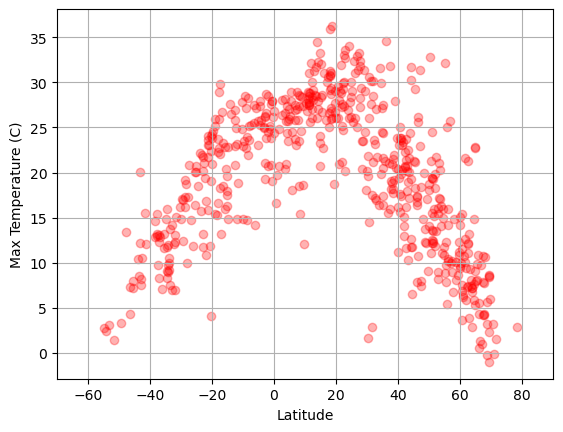

In [100]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values, y_values, alpha=0.3, marker="o", color="red")

# Incorporate the other graph properties
plt.title = "City Max Latitude vs Temperature"
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)
plt.xlim(-70,90)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

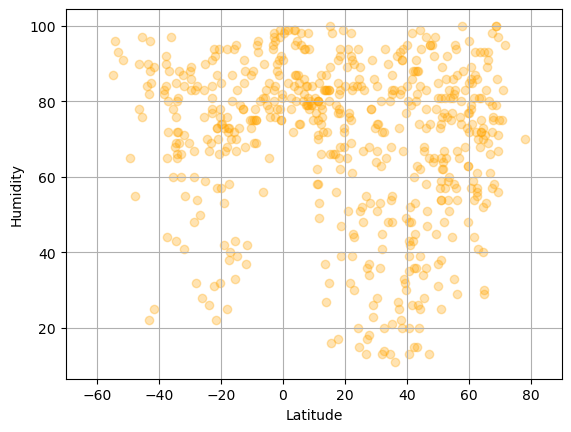

In [101]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values, y_values, alpha=0.3, marker="o", color="orange")

# Incorporate the other graph properties
#plt.title("City Max Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
plt.xlim(-70,90)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

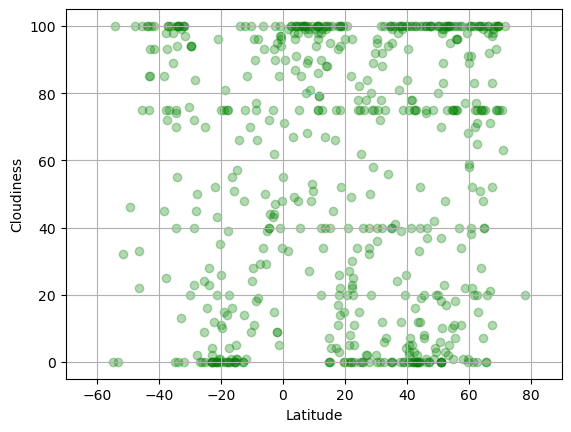

In [102]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values, y_values, alpha=0.3, marker="o", color="green")

# Incorporate the other graph properties
#plt.title("City Max Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
plt.xlim(-70,90)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

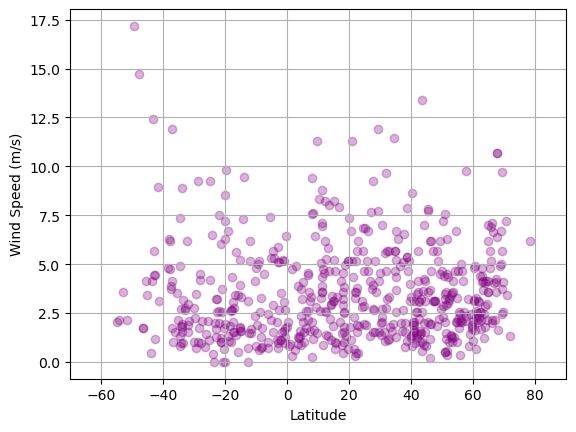

In [103]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values, y_values, alpha=0.3, marker="o", color="purple")

# Incorporate the other graph properties
#plt.title("City Max Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
plt.xlim(-70,90)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [104]:
# Define a function to create Linear Regression plots
slope, intercept, r, p, std_err = stats.linregress(x, y)
#The formula for simple linear regression is Y = mX + b, 
def myfunc(x):
return slope * x + intercept
# YOUR CODE HERE

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
city_lat1 = city_df[(city_data["Latitude"]>= 0)
# students_passing_math_and_reading = school_data_complete[(school_data_complete["reading_score"] >= 70)
northern_hemi_df.append({"City": city, 
                         "Lat": city_lat1, 
                         "Lng": city_lng, 
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})

# Display sample data
northern_hemi_df.head()

In [13]:
# # Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# # YOUR CODE HERE
# city_lat1 = city_df[(city_data["Latitude"]>= 0)
# # students_passing_math_and_reading = school_data_complete[(school_data_complete["reading_score"] >= 70)
# northern_hemi_df.append({"City": city, 
#                          "Lat": city_lat1, 
#                          "Lng": city_lng, 
#                          "Max Temp": city_max_temp,
#                          "Humidity": city_humidity,
#                          "Cloudiness": city_clouds,
#                          "Wind Speed": city_wind,
#                          "Country": city_country,
#                          "Date": city_date})

# # Display sample data
# northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


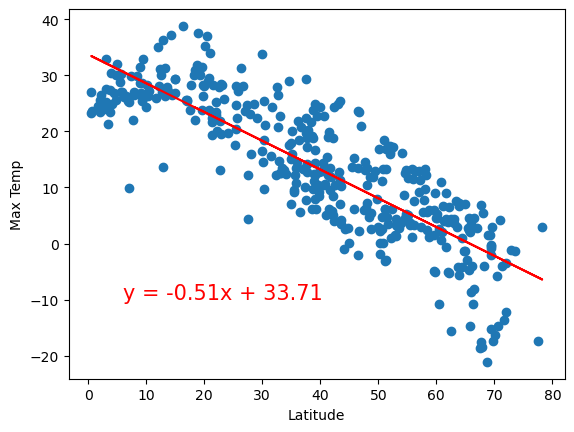

In [15]:
# Linear regression on Northern Hemisphere
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($100,000)')
plt.show()

The r-value is: 0.4121057168607245


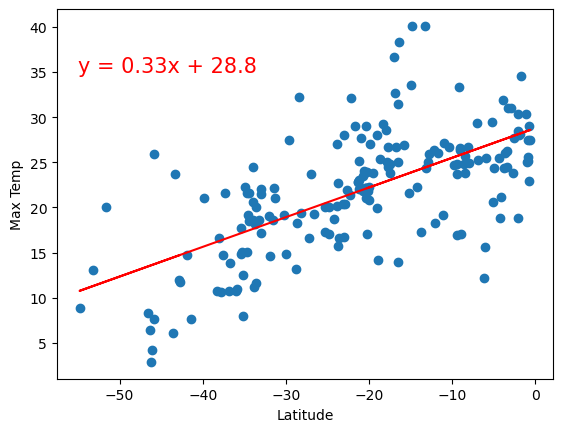

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


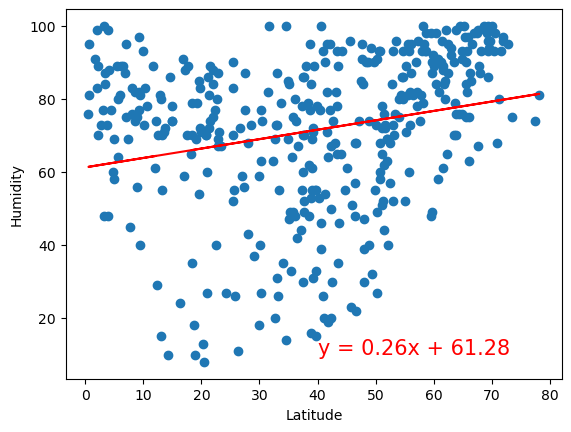

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


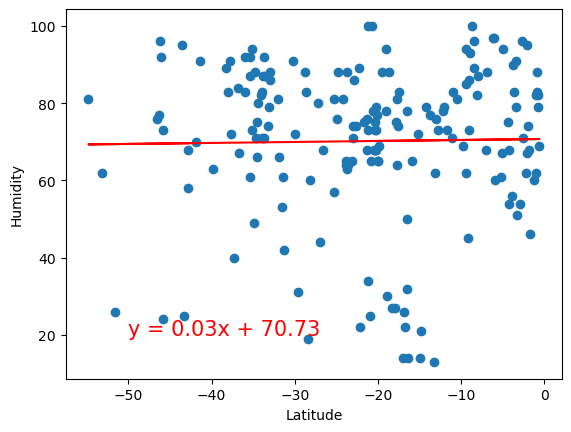

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


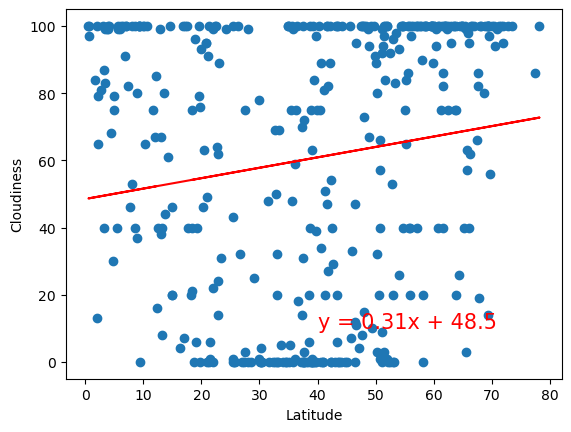

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


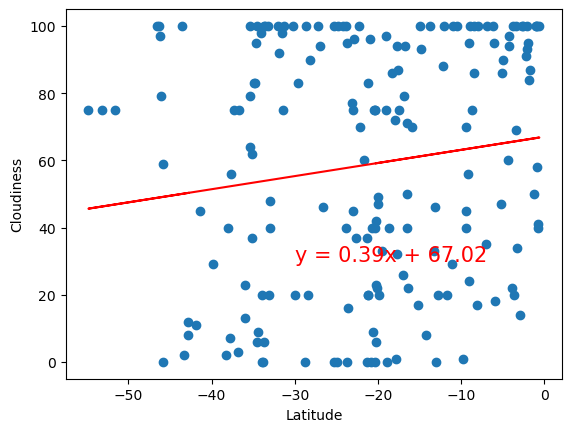

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


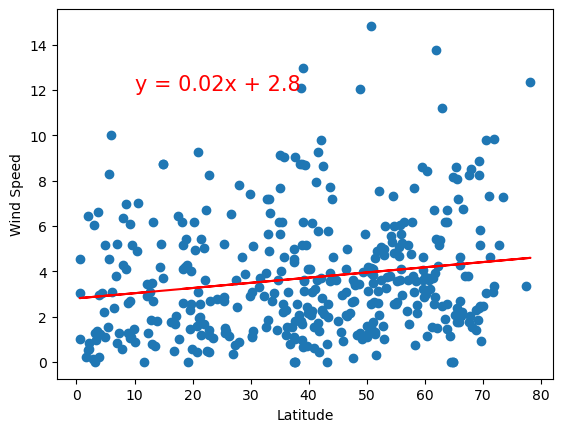

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


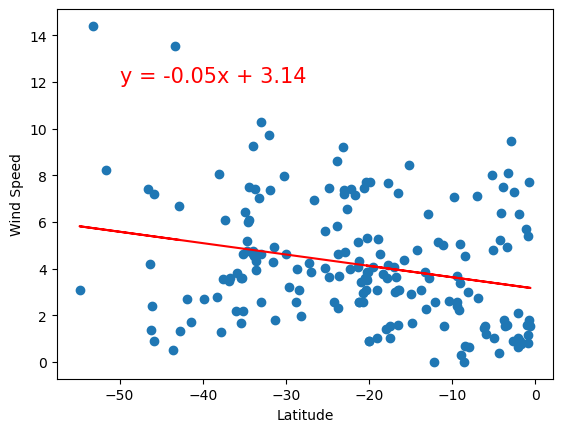

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE